**A Predictive Model to Categorize a Tennis Player’s Maximum Rank**

In [1]:
install.packages("kknn")
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(infer)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

**Introduction**

The dataset we are using: "Player Stats for Top 500 Players" on the Ultimate Tennis Statistics (UTS) website provides comprehensive statistical information about the world's top 500 professional male tennis players. These player statistics offer valuable insights into the performance, strengths, and weaknesses of these athletes. The aim of our study is to create a classification model using K-nearest neighbours analysis of the UTS data set to determine the main variables that affect the maximum rank a player can achieve in a tennis competition. We aim to answer the question: can a player’s maximum rank be predicted via their age, country of origin, the dominant hand they play, and their backhand method? 


**From the url: https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsSLinks which is an external site, we downloaded the data as a ".csv" form data and imported it into the data folder in our jupyter notebook. To read the data, function read_csv("data/player_stats.csv")has been used, then it turns out to be tibble with 501 rows and 38 columns. To tidy up the data as well as choose the variables we'd like to utilize, we use the code such as:**

**Methods**

Data Acquisition, Loading and Wrangling
We first obtained data from the URL (https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsSLinks) which is an external site. Subsequently, we downloaded the data as a ".csv" form data and imported it into the data folder in our Jupyter notebook. To read the data, the function read_csv("data/player_stats.csv") has been used, then it turns out to be tibble with 501 rows and 38 columns. To focus on relevant variables for our analysis, we used the select function to isolate the columns 'Age', 'Country', 'Plays', 'Name', 'BestRank', and 'Backhand'. Further, we cleaned and transformed the data using mutate functions. We removed extraneous characters from the 'BestRank' and 'Age' columns, and converted these to numeric formats for analysis.

Split Data

Next, we separated data into training data and testing data using a proportion of 75/25. With training data, we used the filter function to take ‘Age’ as the predictor, and used group_by and summarize to see the max rank for each age. We also used summarize(count = sum(is.na(Age))) to find if there is any missing data. We found that there are two rows of missing data.  Similarly, ‘Plays’ and ‘Backhand’ are used as predictors in the future algorithm. 

Prediction

Then, we create knn model and linear regression model to predict the best rank of a new observation. Before the prediction, we first figure out the RMSPE of the linear regression model and knn model, as well as compare the two values to see which method is better for our prediction. Finally, we found that the linear regression model is better than the knn model and use it to predict the best rank of a new observation.

For the precise steps of prediction:
(1) Using the training data, we set model and recipe for linear regression, for which, BestRank is used as the receptor and Age, Plays, and Backhand are used as a predictors respectively.

(2) Fit the workflow to the testing data, predict the outcome and calculate the RMSPE.

(3) Similarly, using the training data, we set model and recipe for knn, for which, BestRank is used as the receptor and Age, Plays, and Backhand are used as a predictors respectively.

(4) Fit the new workflow to the testing data, predict the outcome and calculate the RMSPE.

(5) Compare each pair of RMSPE to see which value is smaller,implying which method is better for our prediction.

(6) Create 3 different graphs which are:

1. point graph with x_variable=age, y_variable=BestRank and the linear regression line
2. point graph with x_variable=plays,  y_variable=BestRank and the linear regression line
3. point graph with x_variable=backhand, y_variable=BestRank and the linear regression line

(7) We found that the linear regression model is better than the knn model and use it to predict the best rank of a new observation. Then, for each provide it with a new observation:

for example:
1. age = 18
2. country= Brazil
3. plays= Left-handed
4. Backhand= Two-handed

(8) Finally,We also use multiple predictors to predict the best rank of a new observation by linear regression model. However, because of the limitation of dimentionality and the deficiency of readability, we'll not visualize those linear regression models in 3D.

**Note: In the whole process, we let R to help us to find the best value of k and fold the data to improve the accuracy of our prediction. Moreover, color-blind friendly colors are used in the graphs.**

**Expected outcomes and significance**

From the preliminary data, we expect to find an inverse relationship between age and BestRank; more popular tennis-playing countries (eg. USA, Spain, etc.) might have more players with top rankings; the use of backhand and best rank might not correlate as they might depend on the comfort of the player.

Our findings would be beneficial for predicting how professional tennis players can maximize their training regimen to increase their potential maximum ranking. Future studies should focus on how the same parameters may affect the predicted maximum rank of female tennis players, as the UTS data set used in our study only includes male tennis players. Finally, similar studies could also be applied for other highly competitive sports that are team-oriented, such as basketball, with additional parameters to predict not only the maximum predicted player rank but also maximum predicted rank of various teams.


The results we found were:

* As the age of tennis athlete increase, the BestRank decreases
* Athletes with Two-handed Backhand tend to have lower best rank
* Play hand does not have too much influence on BestRank of athletes 
This was kind of similar to the results we expected to find. We expected to find an inverse relationship between age and BestRank; more popular tennis-playing countries (eg. USA, Spain, etc.) would have more players with top rankings; the use of backhand and BestRank might not correlate as they might depend on the comfort of the player. 

These findings could contribute to analyzing for coaches and tennis players to find out the best way to achieve high performance. Although a tennis player’s country of origin may not contribute directly to their maximum predicted rank, it can correlate to a climate and/or culture more conducive to better conditions for tennis practice. It is important to recognize and appreciate the diverse pathways of athletic development among younger individuals. While there is greater variability during youth, with age and experience, athletes may converge towards more consistent levels of performance as they progress through their sporting careers. 

Through our results, 
Future questions could lead to:
* Is there a difference in performance age between the two genders?
* How could countries influence the play hand and its best rank? 
* Is there a cultural influence to the play hand, depending on the country?


In [2]:
player_data <- read_csv("data/player_stats.csv")|>
                select(Age,Country,Plays,Name,BestRank,Backhand)|>
                mutate(BestRank = gsub("\\([^\\)]+\\)", "", BestRank))|>
                mutate(Age = gsub("\\([^\\)]+\\)", "", Age))|>
                mutate(Age=as.numeric(Age))|>
                mutate(BestRank=as.numeric(BestRank))
player_data

New names:
• `` -> `...1`
Rows: 501 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, BestRank, Name, Back...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age Country            Plays        Name                 BestRank
1   26  Brazil             Right-handed Oscar Jose Gutierrez 363     
2   18  United Kingdom     Left-handed  Jack Draper          316     
3   32  Slovakia           Right-handed Lukas Lacko           44     
4   21  Korea, Republic of Right-handed Duck Hee Lee         130     
5   27  Australia          Right-handed Bernard Tomic         17     
⋮   ⋮   ⋮                  ⋮            ⋮                    ⋮       
497 26  Austria            Right-handed Dominic Thiem          4     
498 23  Netherlands        Left-handed  Gijs Brouwer         342     
499 24  Ukraine            NA           Vladyslav Orlov      419     
500 22  Tunisia            Left-handed  Aziz Dougaz          408     
501 NA  NA                 NA           NA                    NA     
    Backhand  
1   NA        
2   Two-handed
3   Two-handed
4   Two-handed
5   Two-handed
⋮   ⋮         
497 One-handed
498 NA        
499 NA        
500 Two-handed
501 NA

**Seperate the data to taining data and testing data, which is essential for building robust, reliable machine learning models and for assessing their performance in a way that reflects their real-world applicability..**

In [3]:
set.seed(3456) 
tennis_split <- initial_split(player_data,prop=0.75,strata=BestRank)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)
tennis_train
tennis_test

Age Country            Plays        Name                  BestRank
1   27  Australia          Right-handed Bernard Tomic         17      
2   19  Canada             Right-handed Felix Auger Aliassime 17      
3   23  Russian Federation Right-handed Daniil Medvedev        4      
4   31  Argentina          Right-handed Juan Martin Del Potro  3      
5   20  Serbia             Right-handed Miomir Kecmanovic     47      
⋮   ⋮   ⋮                  ⋮            ⋮                     ⋮       
370 20  Russian Federation Right-handed Artem Dubrivnyy       394     
371 20  France             Right-handed Dan Added             380     
372 23  Netherlands        Left-handed  Gijs Brouwer          342     
373 24  Ukraine            NA           Vladyslav Orlov       419     
374 22  Tunisia            Left-handed  Aziz Dougaz           408     
    Backhand  
1   Two-handed
2   Two-handed
3   Two-handed
4   Two-handed
5   Two-handed
⋮   ⋮         
370 Two-handed
371 Two-handed
372 NA        
373 NA        
374 Two-handed

Age Country            Plays        Name               BestRank Backhand  
1   32  Slovakia           Right-handed Lukas Lacko         44      Two-handed
2   22  Poland             Right-handed Hubert Hurkacz      31      Two-handed
3   28  United States      Right-handed Sekou Bangoura     213      Two-handed
4   22  Italy              Right-handed Andrea Pellegrino  312      Two-handed
5   32  Italy              Right-handed Fabio Fognini        9      Two-handed
⋮   ⋮   ⋮                  ⋮            ⋮                  ⋮        ⋮         
123 27  Russian Federation Right-handed Alexey Vatutin     136      Two-handed
124 22  United States      Right-handed Frances Tiafoe      29      Two-handed
125 24  Japan              Left-handed  Yoshihito Nishioka  58      Two-handed
126 31  Ecuador            Left-handed  Gonzalo Escobar    281      Two-handed
127 32  India              Right-handed Saketh Myneni      137      Two-handed

**Using only training data, take Age as the predictor to see the max rank of each age.In this data, there are 2 rows with missing data.**

In [6]:
age_rank_data <- tennis_train|>
                filter(!is.na(Age))|>
                group_by(Age)|>
                summarize(min_rank=min(BestRank,na.rm=TRUE))
age_rank_data
miss_count <- player_data|>
                summarise(count = sum(is.na(Age)))
miss_count

Age min_rank
1  16  446     
2  17  357     
3  18   78     
4  19   17     
5  20   13     
⋮  ⋮   ⋮       
19 34  3       
20 35  6       
21 36  7       
22 37  5       
23 38  1

count
1 2

**Then using the data above to plot a point graph which can help us to find the Age which has the highest BestRank.**

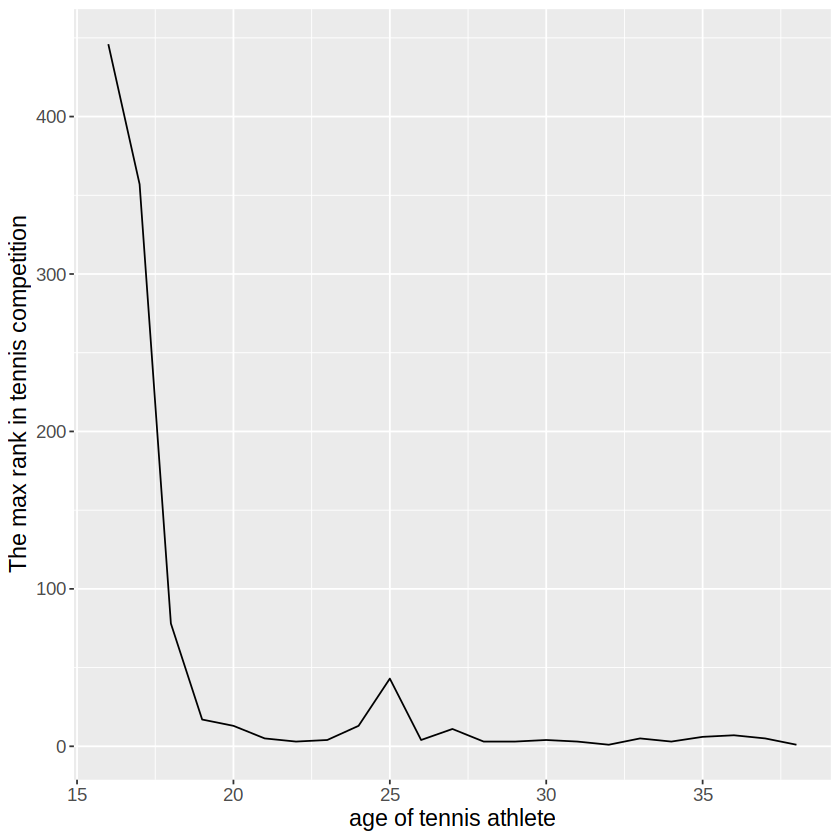

In [7]:
# help us to recognize which age has the highest max-rank in tennis competetion 
age_rank_plot <- age_rank_data|>
                ggplot(aes(x=Age,y=min_rank))+
                geom_line()+
                labs(x="age of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
age_rank_plot

**Using the similar method to deal with other 3 variables selected.**

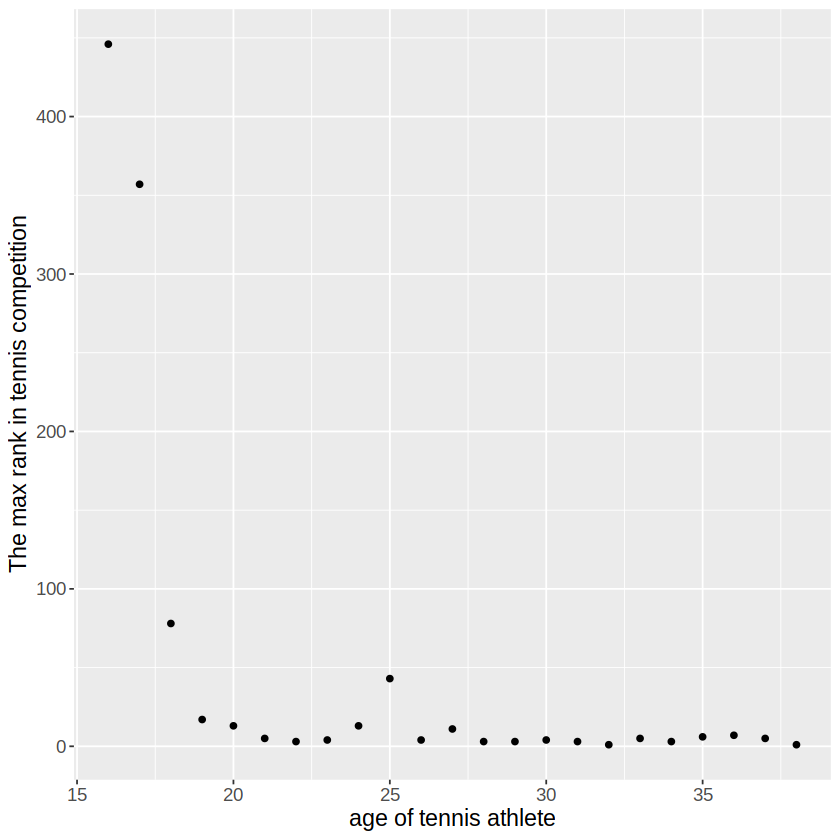

In [8]:
age_rank_plot2 <- age_rank_data|>
                ggplot(aes(x=Age,y=min_rank))+
                geom_point()+
                labs(x="age of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
age_rank_plot2

In [9]:
country_rank_data <- tennis_train|>
                filter(!is.na(Country))|>
                group_by(Country)|>
                summarize(min_rank=min(BestRank,na.rm=TRUE))
country_rank_data

Country        min_rank
1  Argentina        3     
2  Australia       13     
3  Austria          4     
4  Barbados       106     
5  Belarus         80     
⋮  ⋮              ⋮       
55 Ukraine         31     
56 United Kingdom   1     
57 United States    8     
58 Uruguay         19     
59 Uzbekistan     253

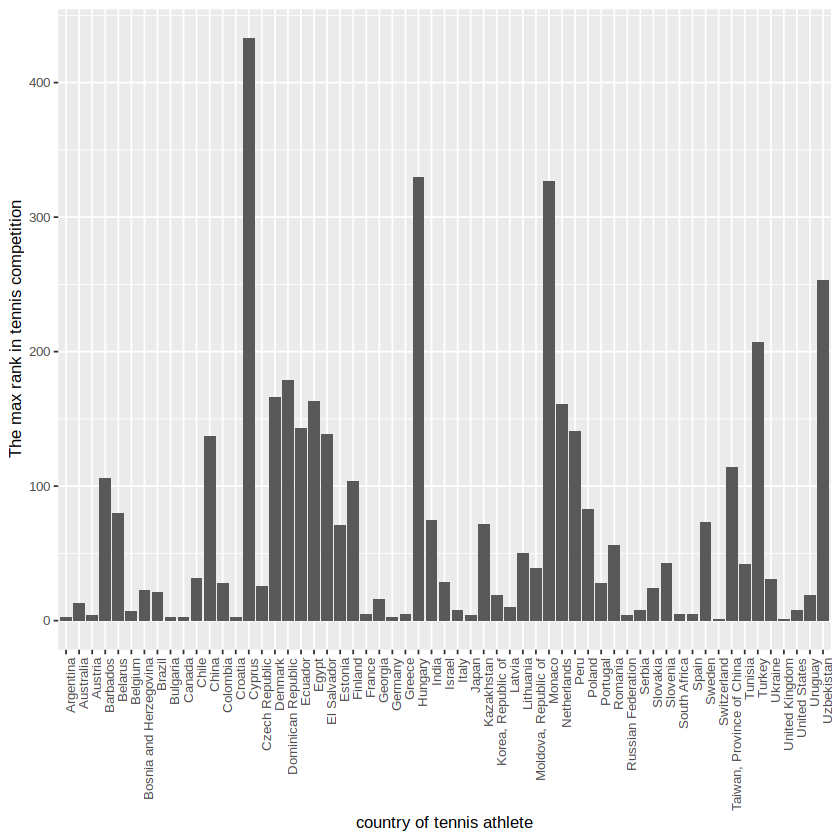

In [11]:
# help us to recognize which country has the highest max-rank in tennis competetion 
country_rank_plot <- country_rank_data|>
                ggplot(aes(x=Country,y=min_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="country of tennis athlete",y="The max rank in tennis competition")+
                theme(text=element_text(size=10))
country_rank_plot

In [12]:
plays_rank_data <- tennis_train|>
                filter(!is.na(Plays))|>
                group_by(Plays)|>
                summarize(min_rank=min(BestRank,na.rm=TRUE))
plays_rank_data

Plays        min_rank
1 Left-handed  7       
2 Right-handed 1

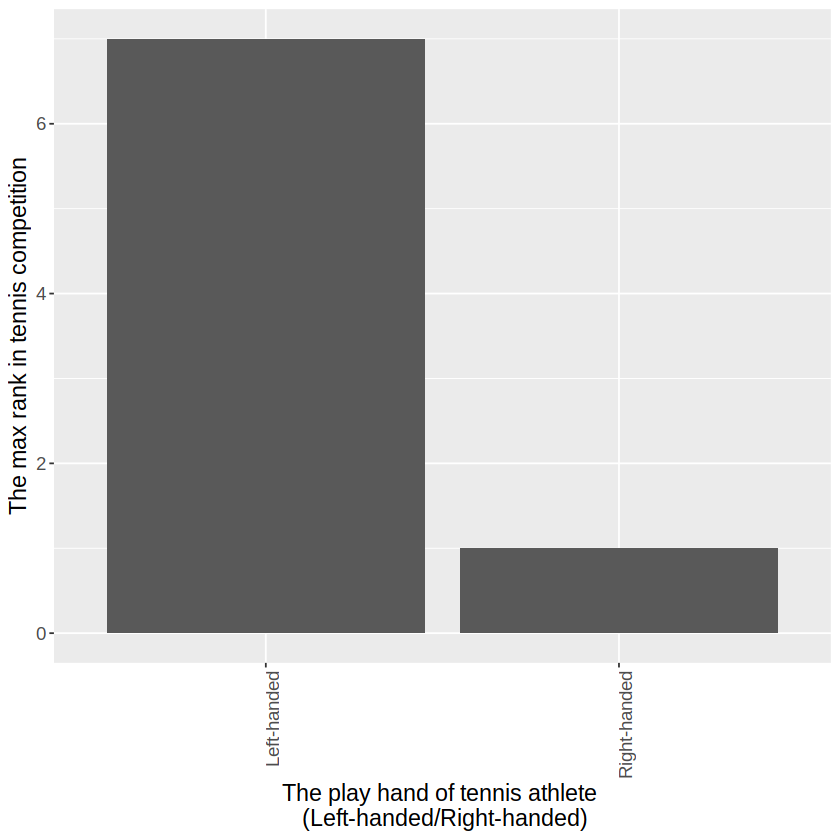

In [13]:
# help us to recognize which play-hand has the highest max-rank in tennis competetion 
plays_rank_plot <- plays_rank_data|>
                ggplot(aes(x=Plays,y=min_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="The play hand of tennis athlete \n (Left-handed/Right-handed)",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
plays_rank_plot

In [14]:
backhand_rank_data <- tennis_train|>
                filter(!is.na(Backhand))|>
                group_by(Backhand)|>
                summarize(min_rank=min(BestRank,na.rm=TRUE))
backhand_rank_data

Backhand   min_rank
1 One-handed 1       
2 Two-handed 1

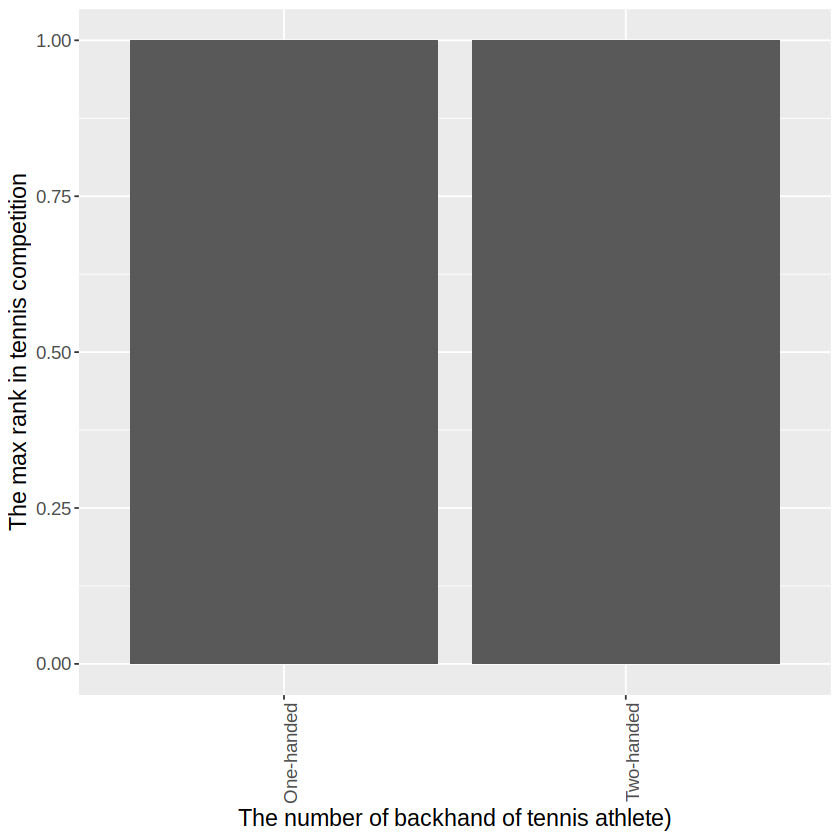

In [15]:
# help us to recognize whether athletes with double backhand have relatively higher max-rank in tennis competetion 
backhand_rank_plot <- backhand_rank_data|>
                ggplot(aes(x=Backhand,y=min_rank))+
                geom_bar(stat = "identity")+
                theme(axis.text.x=element_text(angle=90,hjust=1))+
                labs(x="The number of backhand of tennis athlete)",y="The max rank in tennis competition")+
                theme(text=element_text(size=14))
backhand_rank_plot
# from the graph, it turns to be "Yes"!

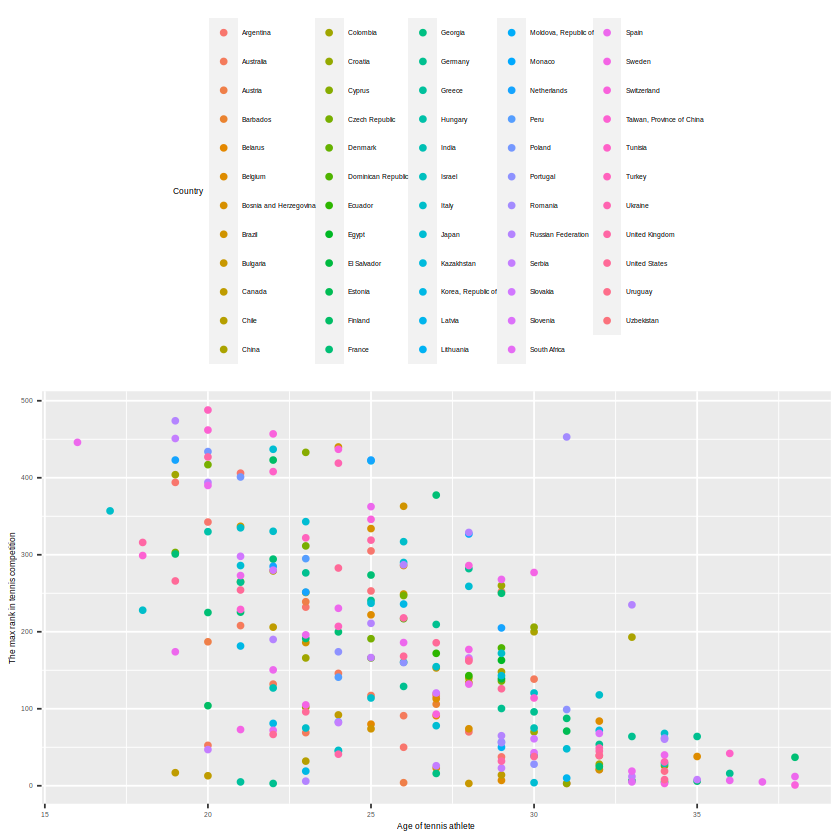

In [17]:
library(ggplot2)

age_rank_plot2 <- tennis_train %>%
  group_by(Country, Age) %>%
  summarise(BestRank = mean(BestRank), .groups = "drop") %>%
  na.omit()

ggplot(age_rank_plot2, aes(x = Age, y = BestRank, color = Country)) +
  geom_point() +
  labs(x = "Age of tennis athlete", y = "The max rank in tennis competition", color = "Country") +
  theme(text = element_text(size = 5),
        legend.position = "top")


**Then, using this plot, we can predict the best rank of a new observation. For example, a 30 years-old Turkey tennis athlete is likely to gain a 270 as his/her BestRank. To figure out the better prediction with higher accuracy, classifiers are needed to be created.**

**To visualize the relationship between the Age and the BestRank, the graph below is created.**

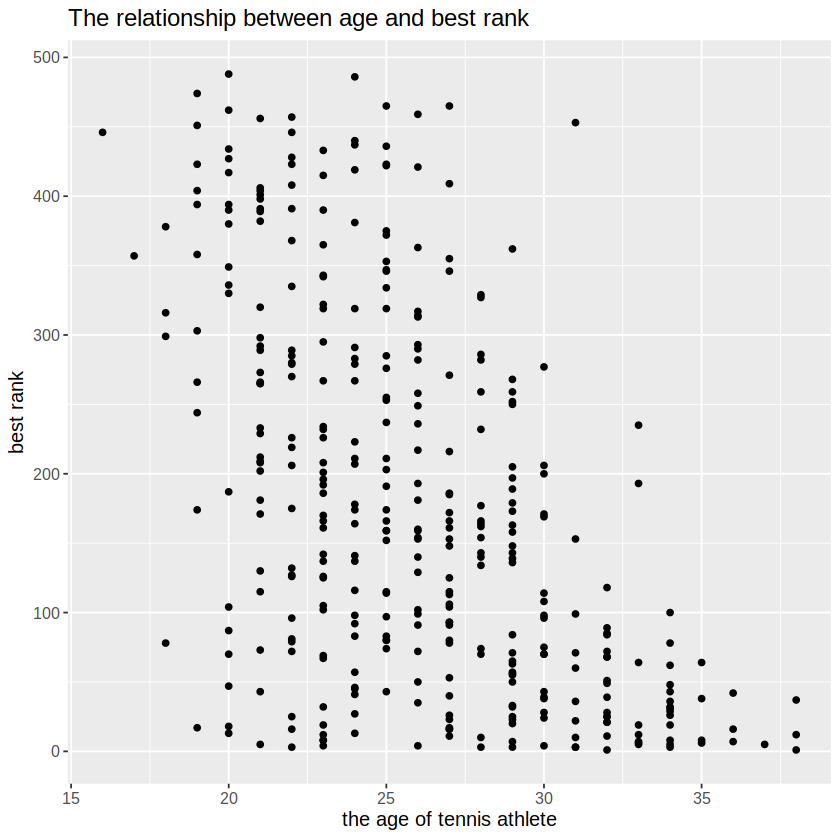

In [18]:

tennis_rank_age_plot <- tennis_train|>
                filter(!is.na(Age))|>
                ggplot(aes(x=Age,y=BestRank))+
                geom_point()+
                labs(x="the age of tennis athlete",
                     y="best rank")+
                theme(text=element_text(size=12))+
                ggtitle("The relationship between age and best rank")
tennis_rank_age_plot

**(1) Set model and recipe for linear regression, for which, BestRank is used as the receptor and Age is used as a predictor**

In [19]:
set.seed(1234)
lm_spec <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
lm_recipe <- recipe(BestRank~Age,data=tennis_train)
lm_fit <- workflow()|>
            add_recipe(lm_recipe)|>
            add_model(lm_spec)|>
            fit(tennis_train)

Now let's calculate the $RMSPE$ using the **test data**

In [20]:
lm_test_results <- lm_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)

lm_rmspe <- lm_test_results |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
lm_rmspe

[1] 109.18

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 109.18003**

Now, let's visualize the model predictions as a straight line overlaid on the test data. 

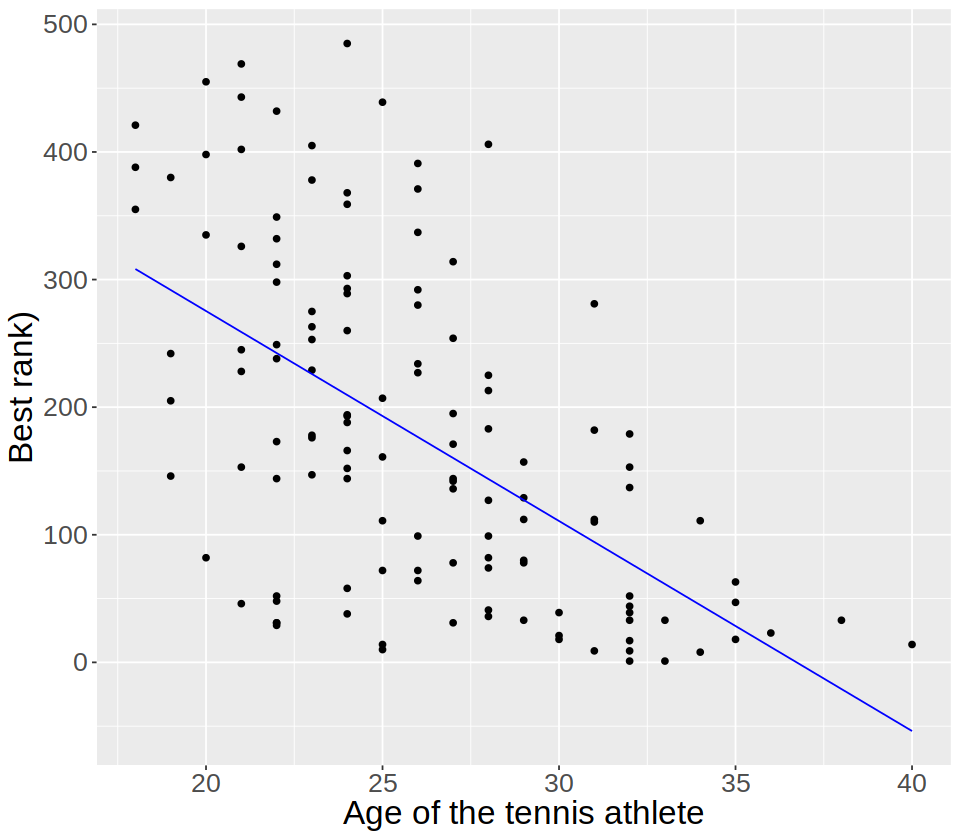

In [21]:
options(repr.plot.width = 8, repr.plot.height = 7)
test_preds <- lm_fit|>
            predict(tennis_test)|>
            bind_cols(tennis_test)
lm_predictions_test <-test_preds|>
                    ggplot(aes(x=Age,y=BestRank))+
                geom_point()+
                geom_line(mapping=aes(x=Age,y=.pred),
                          color="blue")+
                labs(x="Age of the tennis athlete",
                     y="Best rank)")+
                theme(text=element_text(size=20))
lm_predictions_test

Now, We predict the value of BestRank using the $k$-nn **regression**.

In [22]:
set.seed(1234)
tennis_spec2 <- nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
                set_engine("kknn")|>
                set_mode("regression")
tennis_recipe2 <- recipe(BestRank~Age,data=tennis_train)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())
tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = BestRank)
tennis_workflow <- workflow()|>
                    add_recipe(tennis_recipe2)|>
                    add_model(tennis_spec2)

gridvals <- tibble(neighbors = seq(1,50))
k_min <- tennis_workflow|>
                tune_grid(resamples = tennis_vfold, grid = gridvals)|>
                collect_metrics()|>
                filter(.metric == "rmse")|>
                slice_min(mean, with_ties = FALSE)|>
                pull(neighbors)
k_min


x Fold4: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 72 or 1, not 73.

x Fold5: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 72 or 1, not 73.



[1] 41

In [23]:
set.seed(1234)
tennis_best_spec <- nearest_neighbor(weight_func ="rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

tennis_best_fit <- workflow() |>
          add_recipe(tennis_recipe2) |>
          add_model(tennis_best_spec) |>
          fit(data = tennis_train)

tennis_summary <- tennis_best_fit |>
           predict(tennis_test) |>
           bind_cols(tennis_test)|>
           metrics(truth = BestRank, estimate = .pred)|>
           filter(.metric=="rmse")|>
           select(.estimate)|>
           as.numeric()
           
tennis_summary

[1] 113.346

From calculation, by using the $k$-nn regression, **the $RMSPE$ for test data is roughly 113.346**, which is bigger than that produced by linear regression. 

**As a result, linear regression is a better tool to predict the value of BestRank when we use Age as a predictor.**

Now let's visualize the model predictions as a line overlaid on the test data and put the linear regression prediction graph as well as the knn_neighbors prediction graph together.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



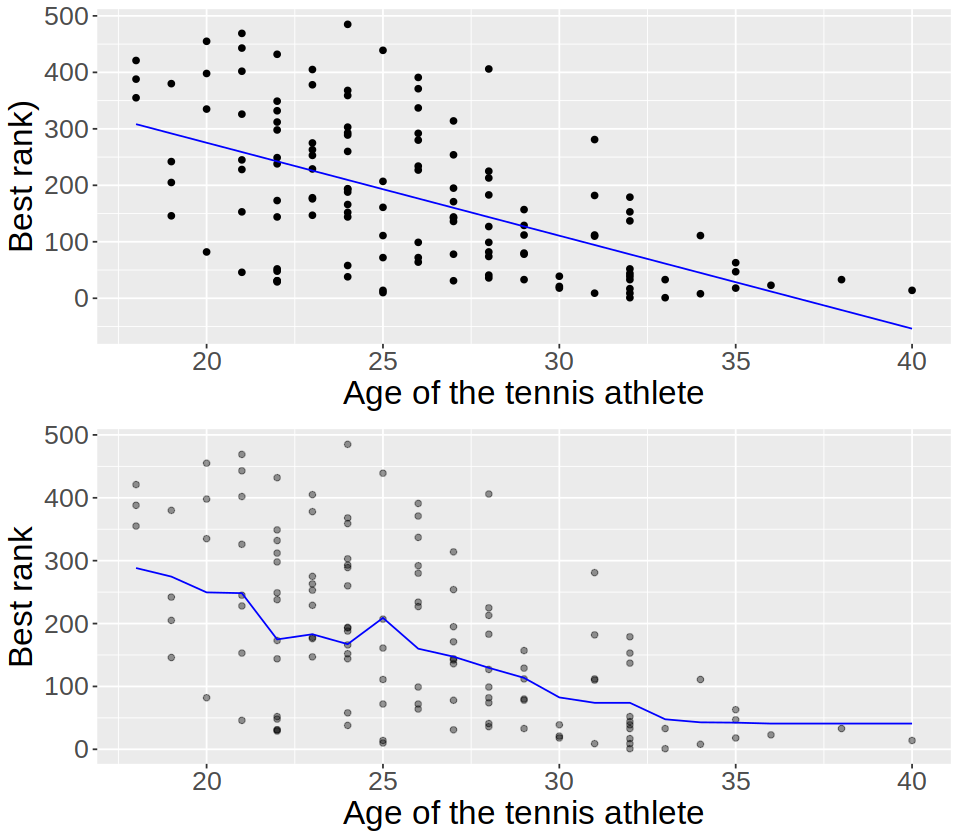

In [24]:
install.packages("cowplot")
library(cowplot)
test_preds <- tennis_best_fit |>
                   predict(tennis_test) |>
                   bind_cols(tennis_test)
predictions_gra <-test_preds|>
                   ggplot(aes(x=Age,y=BestRank))+
                   geom_point(alpha=0.4)+
                   geom_line(data=test_preds,
                          mapping=aes(x=Age,y=.pred),
                            color="blue")+
                   labs(x="Age of the tennis athlete",
                        y="Best rank")+
                   theme(text=element_text(size=20))
two_grids <- plot_grid(lm_predictions_test, predictions_gra, ncol = 1)
two_grids

**Surprisingly, the slope of the prediction line is negative, in other words, as the age of the tennis athlete increases, the predictive best rank of the best rank decreases/turns better.
It's probably because that older athletes may have more experience and a longer history of skill development in tennis. As athletes age, they typically accumulate more hours of practice, which can contribute to improved performance and skill mastery.**

However, from the graph, we can see that the points on the left-hand side are more spread out from the prediction line, which means that the best rank of young tennis athletes has a big variance.
In other words, young athletes have varying abilities, which is different from the elder athletes. This may can be explained by that older athletes may have had more time to specialize in a particular sport or the athletic skills, but Young athletes may still be exploring different sports or engaging in multisport activities, contributing to differences in their abilities. Moreover, younger athletes are still in the early stages of their developmental journeys, not like the elder athletes who have accumulated more years of experience and learning in their respective sports.

**Finally, It's important to recognize and appreciate the diverse pathways of athletic development among young individuals. While there is greater variability in abilities during youth, with age and experience, athletes may converge towards more consistent levels of performance as they progress through their sporting careers.**

**(2)Set model and recipe for linear regression, for which, BestRank is used as the receptor and Plays is used as a predictor.**

**And  Visualize the relationship between the Play-hand and the BestRank**

In [25]:
set.seed(1234)

lm_spec_play <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
lm_recipe_play <- recipe(BestRank~Plays,data=tennis_train)
lm_fit_play <- workflow()|>
            add_recipe(lm_recipe_play)|>
            add_model(lm_spec_play)|>
            fit(tennis_train)


Now let's calculate the $RMSPE$ using the **test data**

In [26]:
lm_test_results_play <- lm_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)

lm_rmspe_play <- lm_test_results_play |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
lm_rmspe_play

[1] 109.18

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 103.1513**

Now, let's visualize the model predictions as a straight line overlaid on the test data. 

Plays        mean_pred
1 Left-handed  170.3673 
2 Right-handed 158.6146

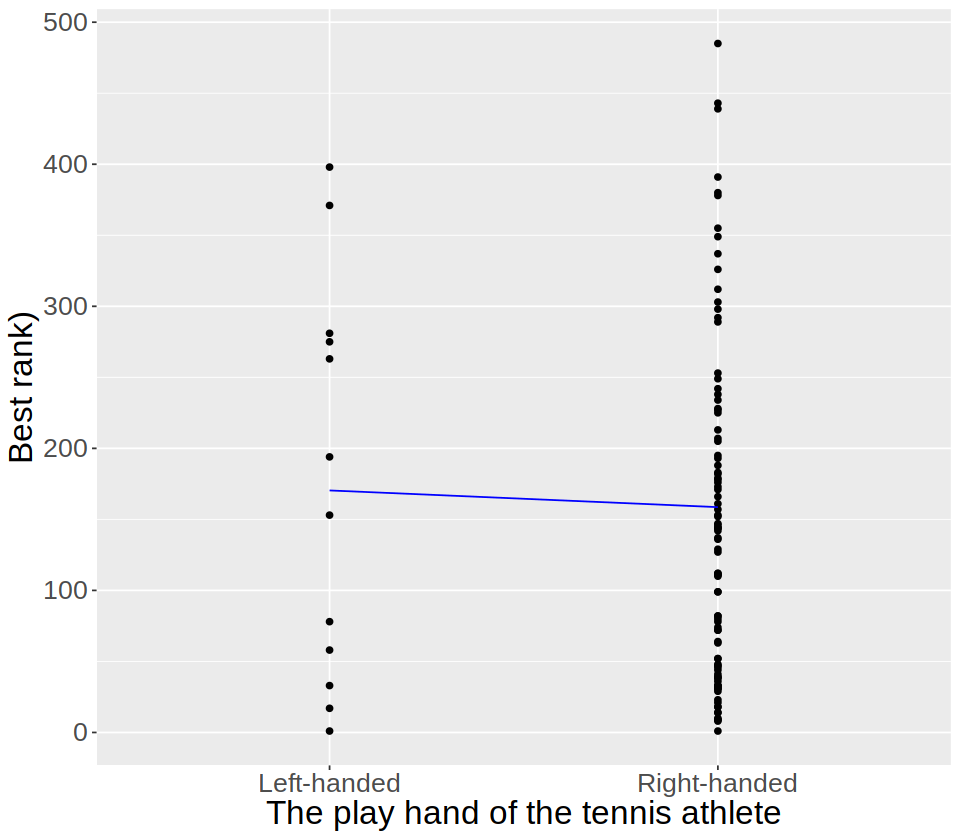

In [27]:

options(repr.plot.width = 8, repr.plot.height = 7)
test_preds_play <- lm_fit_play|>
            predict(tennis_test)|>
            bind_cols(tennis_test)|>
            na.omit(df)|>
            select(.pred,Plays,BestRank)

mean_preds <- test_preds_play %>%
  group_by(Plays) %>%
  summarize(mean_pred = mean(.pred, na.rm = TRUE))

aggregated_mean_preds <- mean_preds %>%
  group_by(Plays) %>%
  summarize(mean_pred = mean(mean_pred, na.rm = TRUE))
aggregated_mean_preds

line_points <- data.frame(
  Plays = c("Left-handed", "Right-handed"),
  BestRank = c(170.3673, 158.6146))

lm_predictions_test_play <-test_preds_play|>
            ggplot(aes(x=Plays,y=BestRank))+
            geom_point()+
            geom_line(data = line_points, aes(group = 1), color = "blue") +
            labs(x="The play hand of the tennis athlete",
                 y="Best rank)")+
            theme(text=element_text(size=20))
lm_predictions_test_play


**From the graph, we can see that the tennis athletes who prefer to use the right hand tend to have better best rank, but it cannot directly imply that the Right-handed tennis athletes are more excellent than those who are Left-handed. Looking at the graph, we can easily find that there are more points on the Right-handed compared to those belong to the Left-handed, which means that the right-handed athletes has a larger size computing an impact on the statistical prediction results.** 

As a result, the play hand doesn't have too much influence on the best rank of tennis athletes, as they might depend on the comfort of the player. 

**To be more specific, we can see the Q-Q plot of the test data to see what kind of the data is.**

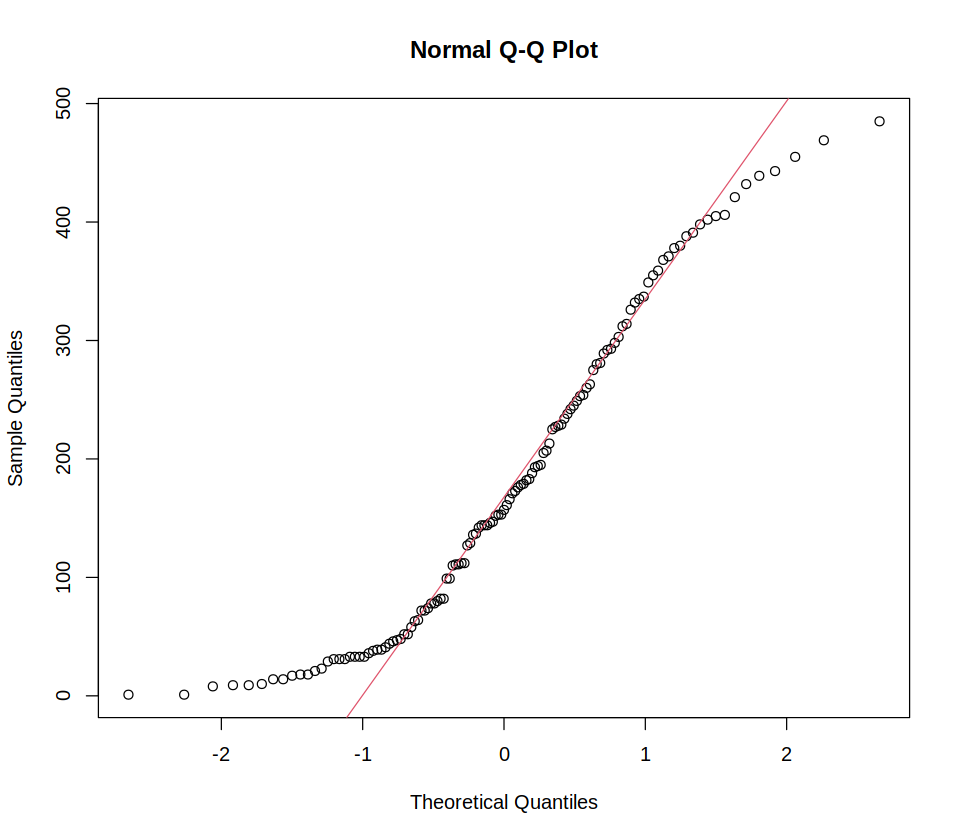

In [28]:
# Assuming lm_fit_play is your linear regression model
lm_preds <- lm_fit_play %>%
  predict(tennis_test) %>%
  bind_cols(tennis_test)

# Q-Q plot for normality
qqnorm(lm_preds$BestRank)
qqline(lm_preds$BestRank, col = 2)


**From the graph, we can say that the distribution of points is in an S-shaped pattern, which may indicate skewness or heavy tails in the distribution.
However, since most of the points falls approximately along a straight line, we assume that this distribution is a normal distribution.**

**Since the formula for the Expect value in normal distribution involves the integral which considers the data range, we already know that 
the Right-handed athletes have a larger sample size of data, it provides impact on calculating the value of the expect value of the Best rank.**

**(3) Set model and recipe for linear regression, for which, BestRank is used as the receptor and Backhand is used as a predictor.**

**And  Visualize the relationship between the Backhand and the BestRank**

In [29]:
set.seed(1234)

lm_spec_back <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
lm_recipe_back <- recipe(BestRank~Backhand,data=tennis_train)
lm_fit_back <- workflow()|>
            add_recipe(lm_recipe_back)|>
            add_model(lm_spec_back)|>
            fit(tennis_train)


Now let's calculate the $RMSPE$ using the **test data**

In [30]:
lm_test_results_back <- lm_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)

lm_rmspe_back <- lm_test_results_play |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
lm_rmspe_back



[1] 109.18

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 103.1513**

Now, let's visualize the model predictions as a straight line overlaid on the test data. 

Backhand   mean_pred
1 One-handed  85.90323
2 Two-handed 149.60595

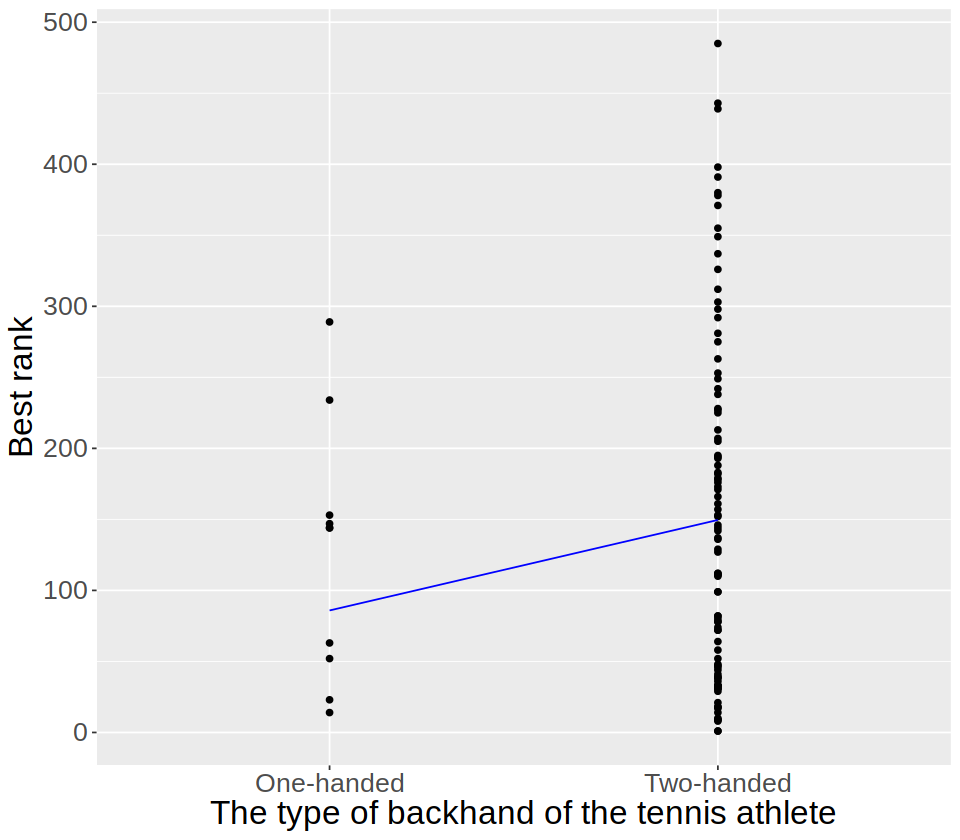

In [31]:
options(repr.plot.width = 8, repr.plot.height = 7)

test_preds_back <- lm_fit_back |>
  predict(tennis_test) |>
  bind_cols(tennis_test) |>
  na.omit(df) |>
  select(.pred, Backhand, BestRank)

mean_preds <- test_preds_back |>
  group_by(Backhand) |>
  summarize(mean_pred = mean(.pred, na.rm = TRUE))
mean_preds

line_points <- data.frame(
  Backhand = c("One-handed", "Two-handed"),
  BestRank = c(85.90323, 149.60595))

lm_predictions_test_back <- test_preds_back |>
  ggplot(aes(x = Backhand, y = BestRank)) +
  geom_point() +
  geom_line(data = line_points, aes(group = 1), color = "blue") +
  labs(x = "The type of backhand of the tennis athlete",
       y = "Best rank") +
  theme(text = element_text(size = 20))

lm_predictions_test_back


**From the graph, we can see that the tennis athletes with Two-handed Backhand tent to have lower best rank, but consider the similar value we mentioned above(it's crucial to consider the potential impact of sample size imbalances), this prediction is not effective enough because of the disparity in the amount of data between the two types.**

**(4)Then, what if we set multiple variables as predictors? Is linear regression still a suitable tool?**

**Let's do the similar calculation as above.**

In [32]:
set.seed(1234)

linear_spec <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
linear_recipe <- recipe(BestRank~Age+Plays,data=tennis_train)
linear_fit <- workflow()|>
            add_recipe(linear_recipe)|>
            add_model(linear_spec)|>
            fit(tennis_train)
linear_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
      (Intercept)                Age  PlaysRight-handed  
          559.814            -14.990             -8.012  


In [33]:
linear_test_results <- linear_fit|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)|>
                    metrics(truth=BestRank,estimate=.pred)
linear_rmspe <- linear_test_results |>
                filter(.metric=="rmse")|>
                select(.estimate)|>
                as.numeric()
linear_rmspe

[1] 106.4888

Now we get that ,by using the linear regression, **the $RMSPE$ for test data is roughly 106.4888**

Then, We predict the value of BestRank using the $k$-nn **regression**.

In [34]:
set.seed(1234)

tennis_best_spec2 <- nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
                    set_engine("kknn")|>
                    set_mode("regression")
tennis_train <-tennis_train|> na.omit()
tennis_test <-tennis_test|> na.omit()
tennis_recipe_age_play <- recipe(BestRank ~ Age + Plays , data = tennis_train) |>
    step_dummy(all_nominal()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = BestRank)
tennis_workflow <- workflow()|>
                    add_recipe(tennis_recipe_age_play)|>
                    add_model(tennis_best_spec2)

gridvals <- tibble(neighbors = seq( 1, 80))

k_min2 <- tennis_workflow |>
            tune_grid(resamples = tennis_vfold, grid = gridvals) |>
            collect_metrics()|>
            filter(.metric == "rmse")|>
            slice_min(mean, with_ties = FALSE)|>
            pull(neighbors)
k_min2



[1] 21

In [35]:
set.seed(1234)
tennis_test<- tennis_test|>
                na.omit()
tennis_best_spec <- nearest_neighbor(weight_func ="rectangular", neighbors = k_min2) |>
          set_engine("kknn") |>
          set_mode("regression")

tennis_best_fit2 <- workflow() |>
          add_recipe(tennis_recipe_age_play) |>
          add_model(tennis_best_spec2) |>
          fit(data = tennis_train)

tennis_summary <- tennis_best_fit2 |>
           predict(tennis_test) |>
           bind_cols(tennis_test)|>
           metrics(truth = BestRank, estimate = .pred)|>
           filter(.metric=="rmse")|>
           select(.estimate)|>
           as.numeric()
tennis_summary

Warning message:
“tune samples were requested but there were 300 rows in the data. 295 will be used.”


[1] 117.7697

From calculation, by using the $k$-nn regression, **the $RMSPE$ for test data is roughly 117.7697**, which is bigger than that produced by linear regression. As a result, linear regression is a better tool to predict the value of BestRank when we use Age,Plays as predictors.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘gridExtra’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



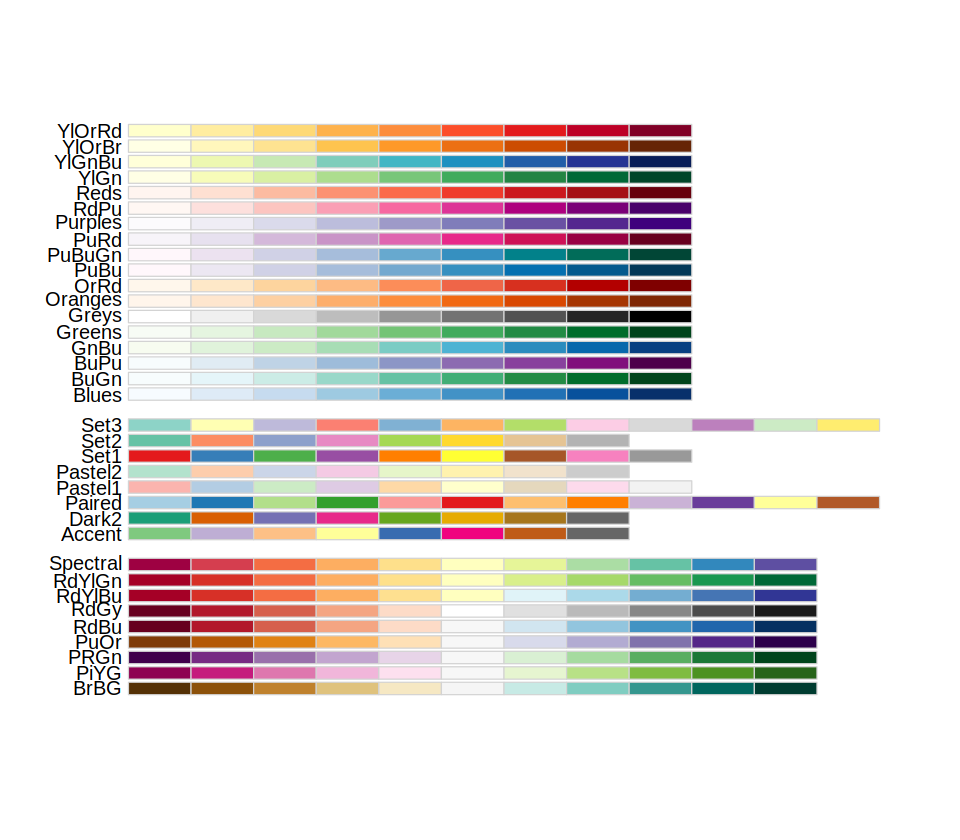

In [36]:
install.packages("RColorBrewer")
install.packages("viridis")
library(RColorBrewer)
display.brewer.all()

.pred     Age Country            Plays        Name               BestRank
1    72.10692 32  Slovakia           Right-handed Lukas Lacko         44     
2   222.01190 22  Poland             Right-handed Hubert Hurkacz      31     
3   132.06891 28  United States      Right-handed Sekou Bangoura     213     
4   222.01190 22  Italy              Right-handed Andrea Pellegrino  312     
5    72.10692 32  Italy              Right-handed Fabio Fognini        9     
⋮   ⋮         ⋮   ⋮                  ⋮            ⋮                  ⋮       
104 147.05941 27  Russian Federation Right-handed Alexey Vatutin     136     
105 222.01190 22  United States      Right-handed Frances Tiafoe      29     
106 200.04241 24  Japan              Left-handed  Yoshihito Nishioka  58     
107  95.10893 31  Ecuador            Left-handed  Gonzalo Escobar    281     
108  72.10692 32  India              Right-handed Saketh Myneni      137     
    Backhand  
1   Two-handed
2   Two-handed
3   Two-handed
4   Two-handed
5   Two-handed
⋮   ⋮         
104 Two-handed
105 Two-handed
106 Two-handed
107 Two-handed
108 Two-handed

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


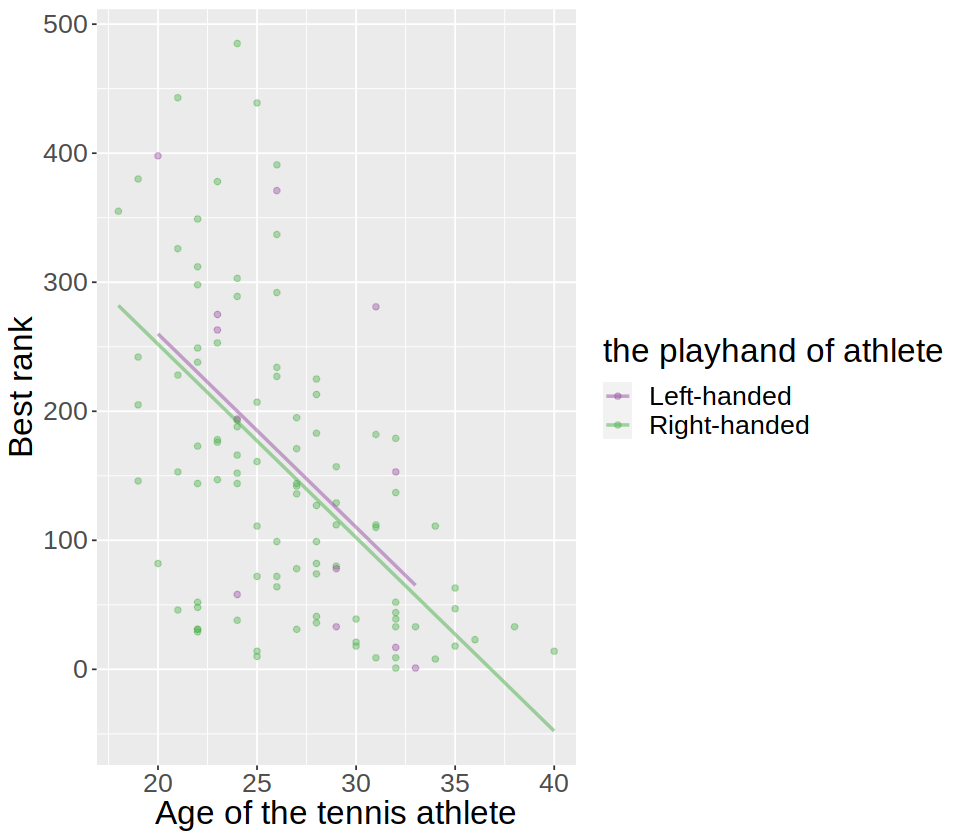

In [37]:
library(ggplot2)
color_set1 <- brewer.pal(n = 9, name = "Set1")
selected_colors <- c(color_set1[4], color_set1[3])
test_preds <- linear_fit |>
           predict(tennis_test) |>
           bind_cols(tennis_test)
test_preds
lm_predictions_test <-test_preds|>
                    ggplot(aes(x=Age,y=BestRank,color=Plays))+
                geom_point(alpha=0.4)+
                geom_line(data=test_preds,
                          mapping=aes(x=Age,y=.pred), 
                          alpha = 0.5,
                          size = 1)+
                labs(x="Age of the tennis athlete",
                     y="Best rank",
                     color="the playhand of athlete")+
                scale_color_manual(values = selected_colors) + 
                theme(text=element_text(size=20))
lm_predictions_test

**From this graph, we see that the prediction lines of two kinds of athletes, one is used to use left hand, and another is used to use the right hand, are roughly overlapping. Therefore, the play hand doesn't have too much influence on the BestRank of athletes as we expected.**

Now we define an observation, and use the fit function created before to predict the BestRank for the observation.

In [38]:
set.seed(1234) 
new_athlete <- tibble(Age = 18, Country="Brazil", Plays="Right-handed", Backhand="Two-handed")
tennis_bestrank_pre <- tennis_best_fit2 |>
           predict(new_athlete)
tennis_bestrank_pre

.pred   
1 144.9695

**Though applying linear regression on a new observation, we can see that the predicted value of BestRank for this athlete is 144.9695**

**Note: We can also use more than one variable as predictor, but in this case, we cannot plot the graph of the prediction as it will exceed the size of the figure(3-D).**

In [39]:
set.seed(1234)

linear_spec_all <- linear_reg()|>
            set_engine("lm")|>
            set_mode("regression")
linear_recipe_all <- recipe(BestRank~Age+Plays+Backhand,data=tennis_train)
linear_fit_all <- workflow()|>
            add_recipe(linear_recipe_all)|>
            add_model(linear_spec_all)|>
            fit(tennis_train)

linear_test_results <- linear_fit_all|>
                    predict(tennis_test)|>
                    bind_cols(tennis_test)
linear_test_results

.pred     Age Country            Plays        Name               BestRank
1    69.88446 32  Slovakia           Right-handed Lukas Lacko         44     
2   205.14073 22  Poland             Right-handed Hubert Hurkacz      31     
3   123.98697 28  United States      Right-handed Sekou Bangoura     213     
4   205.14073 22  Italy              Right-handed Andrea Pellegrino  312     
5    69.88446 32  Italy              Right-handed Fabio Fognini        9     
⋮   ⋮         ⋮   ⋮                  ⋮            ⋮                  ⋮       
104 137.51260 27  Russian Federation Right-handed Alexey Vatutin     136     
105 205.14073 22  United States      Right-handed Frances Tiafoe      29     
106 171.83884 24  Japan              Left-handed  Yoshihito Nishioka  58     
107  77.15944 31  Ecuador            Left-handed  Gonzalo Escobar    281     
108  69.88446 32  India              Right-handed Saketh Myneni      137     
    Backhand  
1   Two-handed
2   Two-handed
3   Two-handed
4   Two-handed
5   Two-handed
⋮   ⋮         
104 Two-handed
105 Two-handed
106 Two-handed
107 Two-handed
108 Two-handed

Now we define an observation, and use the fit function created before to predict the BestRank for the observation.

In [45]:
set.seed(1234) 
new_athlete <- tibble(Age = 18, Country="Brazil", Plays="Right-handed", Backhand="Two-handed")


In [46]:
## using all predictors to predict the best rank of the new observation
tennis_bestrank_pre <- linear_fit_all |>
           predict(new_athlete)
tennis_bestrank_pre

.pred   
1 259.2432

In [48]:
## Using Age and Plays as predictors to predict the best rank of the new observation
tennis_bestrank_age_play <- linear_fit|>
                predict(new_athlete)
tennis_bestrank_age_play

.pred   
1 281.9739

In [41]:
## using only Age as a predictor to predict the best rank of the new observation
tennis_bestrank_age <- lm_fit|>
                predict(new_athlete)
tennis_bestrank_age

.pred   
1 308.2586

In [42]:
## using only Plays as a predictor to predict the best rank of the new observation
tennis_bestraank_play <- lm_fit_play|>
                predict(new_athlete)
tennis_bestraank_play

.pred   
1 158.6146

In [43]:
## using only Backhand as a predictor to predict the best rank of the new observation
tennis_bestraank_backhand <- lm_fit_back|>
                predict(new_athlete)
tennis_bestraank_backhand

.pred   
1 149.6059

**References**

1. “Ultimate Tennis Statistics.” www.ultimatetennisstatistics.com, www.ultimatetennisstatistics.com/.
2. Loffing, Florian, et al. “Left-Handedness in Professional and Amateur Tennis.” PLoS ONE, edited by Alejandro Lucia, vol. 7, no. 11, Nov. 2012, p. e49325, https://doi.org/10.1371/journal.pone.0049325.
3. “On-Court Position and Handedness in Visual Anticipation of Stroke Direction in Tennis.” Psychology of Sport and Exercise, vol. 27, Nov. 2016, pp. 195–204, https://doi.org/10.1016/j.psychsport.2016.08.014. Accessed 18 May 2019.

Potential studies to cite

-Results show handedness does not impact ranking in higher level tennis (pro), but does in amateur tennis
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3492260/

-For further analysis/building of model discussion: another factor to consider may be court position, as handedness may be more of an impactful variable once court position is taken into consideration
https://www.sciencedirect.com/science/article/abs/pii/S1469029216301194 

Source of our data:
https://www.ultimatetennisstatistics.com/  


**The end**